Empezamos cargando los dataframes con los que vamos a trabajar:

In [1]:
import pandas as pd

# Leer el archivo csv original especificando el delimitador como ';'
df_original = pd.read_csv("Calidad_de_agua_2021.csv", sep=';')

# Creamos una copia del DataFrame
df = df_original.copy()

# Añadimos un dataframe que creamos con la distancia aproximada de donde se tomaron las muestras
df_distancias = pd.read_csv("distancias.csv");
df_con_id = pd.read_csv("DataFrame_con_identificadores_completados.csv")


In [2]:
#Esto es para que nos muestre todas las columnas y las filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Veamos los tipos de datos con los que estamos trabajando

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    166 non-null    int64 
 1   sitios                   166 non-null    object
 2   codigo                   166 non-null    object
 3   fecha                    166 non-null    object
 4   año                      166 non-null    int64 
 5   campaña                  166 non-null    object
 6   tem_agua                 166 non-null    object
 7   tem_aire                 162 non-null    object
 8   od                       166 non-null    object
 9   ph                       166 non-null    object
 10  olores                   166 non-null    object
 11  color                    166 non-null    object
 12  espumas                  166 non-null    object
 13  mat_susp                 166 non-null    object
 14  colif_fecales_ufc_100ml  166 non-null    o

Empezamos a ver los tipos y modificarlos para que sean datos mas manejables 

In [4]:
df['espumas'].value_counts(dropna=False)

espumas
Ausencia       138
no se midió     15
Presencia        8
Ausencia         5
Name: count, dtype: int64

In [5]:
# Aca identificamos las que estan escritas dif (para saber sus diferencias tambien)
for idx in df["espumas"].value_counts().items():
   print(idx)

('Ausencia', 138)
('no se midió', 15)
('Presencia', 8)
('Ausencia ', 5)


In [6]:
# Remplazo los valores q estan escritos distintos para q esten iguales
df['espumas'] = df['espumas'].replace("Ausencia ", 'Ausencia')
df['espumas'] = df['espumas'].replace("no se midió", pd.NA)


In [7]:
# Aca miramos la cantidad de NaN y miramos cuales los los tipos que contiene
print(df["espumas"].isna().sum())
print(df["espumas"].unique())

15
['Ausencia' 'Presencia' <NA>]


In [8]:
#Los pasamos a Booleano para mejor manipulacion  y los nulos los ignoramos para que sigan estando
df['espumas'] = df['espumas'].map({'Presencia': True, 'Ausencia': False}, na_action= 'ignore')


In [9]:
#Verificamos que efectivamente no se borraron los NaN
df["espumas"].isna().sum()

np.int64(15)

In [10]:
#Empezamos a curar otra columna, este caso "fecha"
df['fecha'].value_counts(dropna=False)

fecha
27/10/2021    42
25/8/2021     42
19/5/2021     41
24/2/2021     41
Name: count, dtype: int64

In [11]:
#pasamos la fecha a formato date
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [12]:
# Miramos el contenido de campaña 
df['campaña'].value_counts()

campaña
primavera    42
invierno     42
otoño        41
verano       41
Name: count, dtype: int64

In [13]:
# Miramos el contenido de la temperatura del agua 
df['tem_agua'].value_counts(dropna=False)

tem_agua
no se midió    17
24.7            6
14.8            5
26              5
14.5            5
14.4            4
25.5            4
11              4
10              4
15              3
23.8            3
24              3
14.7            3
15.7            3
24.9            3
13              3
26.1            3
16              2
25.7            2
25.6            2
24.6            2
15.1            2
23.5            2
22.4            2
14.6            2
18              2
13.8            2
15.2            2
24.2            2
24.8            2
14              2
21.4            2
16.7            2
12              2
7               2
20              2
21              2
12.9            2
16.2            2
25              2
15.3            2
27              2
22              2
24.5            2
15.6            1
24.4            1
25.4            1
25.2            1
25.8            1
13.5            1
17              1
23.6            1
27.5            1
28              1
15.9            1
2

In [14]:
# Reemplazas a los "no se midio" por NaN y dsp lo pasamos a tipo numerico
df['tem_agua'] = df['tem_agua'].replace("no se midió", pd.NA)
df['tem_agua'] = pd.to_numeric(df['tem_agua'] )



In [15]:
# Hacemos lo mismo con los datos del aire 
df['tem_aire'] = df['tem_aire'].replace("no se midió", pd.NA)
df['tem_aire'] = pd.to_numeric(df['tem_aire'])

Hacemos lo mismo que antes con las variables cuantitativas

In [16]:
#  Cambiamos los no se midio por NaN y pasamos los datos a tipo numerico (los que pueden)


df['od'] = df['od'].replace("no se midió", pd.NA)
df['od'] = pd.to_numeric(df['od'], errors='ignore')

df['ph'] = df['ph'].replace("no se midió", pd.NA)
df['ph'] = pd.to_numeric(df['ph'], errors='ignore')

df['colif_fecales_ufc_100ml'] = df['colif_fecales_ufc_100ml'].replace("no se midió", pd.NA) 
df['colif_fecales_ufc_100ml'] = pd.to_numeric(df['colif_fecales_ufc_100ml'], errors='ignore')

df['escher_coli_ufc_100ml'] = df['escher_coli_ufc_100ml'].replace("no se midió", pd.NA)
df['escher_coli_ufc_100ml'] = pd.to_numeric(df['escher_coli_ufc_100ml'], errors='ignore')

df['enteroc_ufc_100ml'] = df['enteroc_ufc_100ml'].replace("no se midió", pd.NA)
df['enteroc_ufc_100ml'] = pd.to_numeric(df['enteroc_ufc_100ml'], errors='ignore')

df['nitrato_mg_l'] = df['nitrato_mg_l'].replace("no se midió", pd.NA)
df['nitrato_mg_l'] = pd.to_numeric(df['nitrato_mg_l'], errors='ignore')

df['nh4_mg_l'] = df['nh4_mg_l'].replace("no se midió", pd.NA)
df['nh4_mg_l'] = pd.to_numeric(df['nh4_mg_l'], errors='ignore')

df['p_total_l_mg_l'] = df['p_total_l_mg_l'].replace("no se midió", pd.NA)
df['p_total_l_mg_l'] = pd.to_numeric(df['p_total_l_mg_l'], errors='ignore')

df['fosf_ortofos_mg_l'] = df['fosf_ortofos_mg_l'].replace("no se midió", pd.NA)
df['fosf_ortofos_mg_l'] = pd.to_numeric(df['fosf_ortofos_mg_l'], errors='ignore')

df['dbo_mg_l'] = df['dbo_mg_l'].replace("no se midió", pd.NA)
df['dbo_mg_l'] = pd.to_numeric(df['dbo_mg_l'], errors='ignore')

df['dqo_mg_l'] = df['dqo_mg_l'].replace("no se midió", pd.NA)
df['dqo_mg_l'] = pd.to_numeric(df['dqo_mg_l'], errors='ignore')

df['turbiedad_ntu'] = df['turbiedad_ntu'].replace("no se midió", pd.NA)
df['turbiedad_ntu'] = pd.to_numeric(df['turbiedad_ntu'], errors='ignore')

df['hidr_deriv_petr_ug_l'] = df['hidr_deriv_petr_ug_l'].replace("no se midió", pd.NA)
df['hidr_deriv_petr_ug_l'] = pd.to_numeric(df['hidr_deriv_petr_ug_l'], errors='ignore')

df['cr_total_mg_l'] = df['cr_total_mg_l'].replace("no se midió", pd.NA)
df['cr_total_mg_l'] = pd.to_numeric(df['cr_total_mg_l'], errors='ignore')

df['cd_total_mg_l'] = df['cd_total_mg_l'].replace("no se midió", pd.NA)
df['cd_total_mg_l'] = pd.to_numeric(df['cd_total_mg_l'], errors='ignore')

df['clorofila_a_ug_l'] = df['clorofila_a_ug_l'].replace("no se midió", pd.NA)
df['clorofila_a_ug_l'] = pd.to_numeric(df['clorofila_a_ug_l'], errors='ignore')

df['microcistina_ug_l'] = df['microcistina_ug_l'].replace("no se midió", pd.NA)
df['microcistina_ug_l'] = pd.to_numeric(df['microcistina_ug_l'], errors='ignore')

df['ica'] = df['ica'].replace("no se midió", pd.NA)
df['ica'] = pd.to_numeric(df['ica'], errors='ignore')


C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\3807158427.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['od'] = pd.to_numeric(df['od'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\3807158427.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['ph'] = pd.to_numeric(df['ph'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\3807158427.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['colif_fecales_ufc_100ml'] = pd.to_numeric(df['colif_fecales_ufc_100ml'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\3807158427.py:14: FutureWarning: errors='ignore' is deprecate

In [17]:
# Corroboramos como van quedando los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   orden                    166 non-null    int64         
 1   sitios                   166 non-null    object        
 2   codigo                   166 non-null    object        
 3   fecha                    166 non-null    datetime64[ns]
 4   año                      166 non-null    int64         
 5   campaña                  166 non-null    object        
 6   tem_agua                 149 non-null    float64       
 7   tem_aire                 137 non-null    float64       
 8   od                       150 non-null    float64       
 9   ph                       150 non-null    float64       
 10  olores                   166 non-null    object        
 11  color                    166 non-null    object        
 12  espumas                  151 non-nul

Los pasamos a Booleano los que quedaban con (Presencia, Ausencia y "no se midio"), de la misma manera que hicimos con la columna Espuma

In [18]:
# Aca identificamos las la dif entre como estan escritos
for idx in df['olores'].value_counts().items():
   print(idx)

('Ausencia', 126)
('Presencia', 19)
('no se midió', 15)
('Ausencia ', 6)


In [19]:
# Remplazo los valores q estan escritos distintos para q esten iguales
df['olores'] = df['olores'].replace("Ausencia ", 'Ausencia')
df['olores'] = df['olores'].replace("no se midió", pd.NA)

#Los pasamos a Booleano para mejor manupilacion 
df['olores'] = df['olores'].map({'Presencia': True, 'Ausencia': False})

In [20]:
# Reemplazamos lo "no se midio" por NaN
df['calidad_de_agua'] = df['calidad_de_agua'].replace("no se midió", pd.NA)
#df['calidad_de_agua'].value_counts()

Hacemos lo mismo con color

In [21]:
# Aca identificamos las la dif entre como estan escritos
for idx in df['color'].value_counts().items():
   print(idx)

('Ausencia', 127)
('Presencia', 18)
('no se midió', 15)
('Ausencia ', 5)
('ausenca', 1)


In [22]:
# Remplazo los valores q estan escritos distintos para q esten iguales
df['color'] = df['color'].replace("Ausencia ", 'Ausencia')
df['color'] = df['color'].replace("ausenca", 'Ausencia')
df['color'] = df['color'].replace("no se midió", pd.NA)
df['color'] = df['color'].map({'Presencia': True, 'Ausencia': False})


Con materia suspendida:

In [23]:
# Aca identificamos las la dif entre como estan escritos
for idx in df['mat_susp'].value_counts().items():
   print(idx)

('Ausencia', 116)
('Presencia', 30)
('no se midió', 15)
('Ausencia ', 5)


In [24]:
# Remplazo los valores q estan escritos distintos para q esten iguales
df['mat_susp'] = df['mat_susp'].replace("Ausencia ", 'Ausencia')
df['mat_susp'] = df['mat_susp'].replace("no se midió", pd.NA)

#Los pasamos a Booleano para mejor manupilacion 
df['mat_susp'] = df['mat_susp'].map({'Presencia': True, 'Ausencia': False})

In [25]:
# Miramos como quedaron los datos en el dataframe

df.value_counts(dropna=False)

orden  sitios                                     codigo   fecha       año   campaña    tem_agua  tem_aire  od     ph    olores  color  espumas  mat_susp  colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica   calidad_de_agua           
1      Canal Villanueva y Río Luján               TI001    2021-02-24  2021  verano     25.6      27.0      3.91   6.96  False   False  False    True      4000                     1000.0                 330.0              6.5           0.4       0.92            0.37               <2.0      <30       60             <100                  <5.0           <0.001         0                 <0.15              42.0  Extremadamente deteriorada    1
                                                           2021-05-19  2021  otoño      15.6      13.0      8.28   6.79

Creamos una variable llamada filas_parcialmente_nan para saber que tienen nulos en todas las variables cuantitativas

In [26]:
# df.isna() me dice que valores son nulos
# sum(axis = 1) suma los nulos pero suma de columna a columna (osea cuantos nulos tiene una fila)
# len(df.columns) - 6  simplemente te dice la longitud (de las columnas) y le resto 6 porq no quiero que tome en cuenta los 6 primeros

filas_parcialmente_nan = df[df.isna().sum(axis=1) == (len(df.columns) - 6)]

Y ahora eliminamos estas filas

In [27]:
# Eliminar estas filas
df = df.drop(filas_parcialmente_nan.index)

Eliminamos las columnas con datos innecesarios

In [28]:
df = df.drop('año', axis=1)
df = df.drop('orden', axis=1)
df = df.drop('fecha', axis=1)

Eliminamos los simbolos < y > de las columnas cuantitativas ya que tienen precisión distinta por variable.

In [29]:
# Eliminar los símbolos < y > de la columna 'valores'

df['colif_fecales_ufc_100ml'] = df['colif_fecales_ufc_100ml'].str.replace('<', '').str.replace('>', '')
df['nitrato_mg_l'] = df['nitrato_mg_l'].str.replace('<', '').str.replace('>', '')
df['nh4_mg_l'] = df['nh4_mg_l'].str.replace('<', '').str.replace('>', '')
df['p_total_l_mg_l'] = df['p_total_l_mg_l'].str.replace('<', '').str.replace('>', '')
df['fosf_ortofos_mg_l'] = df['fosf_ortofos_mg_l'].str.replace('<', '').str.replace('>', '')
df['dbo_mg_l'] = df['dbo_mg_l'].str.replace('<', '').str.replace('>', '')
df['dqo_mg_l'] = df['dqo_mg_l'].str.replace('<', '').str.replace('>', '')
df['turbiedad_ntu'] = df['turbiedad_ntu'].str.replace('<', '').str.replace('>', '')
df['hidr_deriv_petr_ug_l'] = df['hidr_deriv_petr_ug_l'].str.replace('<', '').str.replace('>', '')
df['cr_total_mg_l'] = df['cr_total_mg_l'].str.replace('<', '').str.replace('>', '')
df['cd_total_mg_l'] = df['cd_total_mg_l'].str.replace('<', '').str.replace('>', '')
df['clorofila_a_ug_l'] = df['clorofila_a_ug_l'].str.replace('<', '').str.replace('>', '')
df['microcistina_ug_l'] = df['microcistina_ug_l'].str.replace('<', '').str.replace('>', '')
df['dqo_mg_l'] = df['dqo_mg_l'].str.replace('<', '').str.replace('>', '')
df['dqo_mg_l'] = df['dqo_mg_l'].str.replace('<', '').str.replace('>', '')


Pasamos a tipo de dato numerico estos datos que figuraban como string por los '<' y '>'

In [30]:
# Y ahora que los valores dejaron de ser string , los convertimos en numericos

df['od'] = pd.to_numeric(df['od'], errors='ignore')
df['ph'] = pd.to_numeric(df['ph'], errors='ignore')
df['colif_fecales_ufc_100ml'] = pd.to_numeric(df['colif_fecales_ufc_100ml'], errors='ignore')
df['escher_coli_ufc_100ml'] = pd.to_numeric(df['escher_coli_ufc_100ml'], errors='ignore')
df['enteroc_ufc_100ml'] = pd.to_numeric(df['enteroc_ufc_100ml'], errors='ignore')
df['nitrato_mg_l'] = pd.to_numeric(df['nitrato_mg_l'], errors='ignore')
df['nh4_mg_l'] = pd.to_numeric(df['nh4_mg_l'], errors='ignore')
df['p_total_l_mg_l'] = pd.to_numeric(df['p_total_l_mg_l'], errors='ignore')
df['fosf_ortofos_mg_l'] = pd.to_numeric(df['fosf_ortofos_mg_l'], errors='ignore')
df['dbo_mg_l'] = pd.to_numeric(df['dbo_mg_l'], errors='ignore')
df['dqo_mg_l'] = pd.to_numeric(df['dqo_mg_l'], errors='ignore')
df['turbiedad_ntu'] = pd.to_numeric(df['turbiedad_ntu'], errors='ignore')
df['hidr_deriv_petr_ug_l'] = pd.to_numeric(df['hidr_deriv_petr_ug_l'], errors='ignore')
df['cr_total_mg_l'] = pd.to_numeric(df['cr_total_mg_l'], errors='ignore')
df['cd_total_mg_l'] = pd.to_numeric(df['cd_total_mg_l'], errors='ignore')
df['clorofila_a_ug_l'] = pd.to_numeric(df['clorofila_a_ug_l'], errors='ignore')
df['microcistina_ug_l'] = pd.to_numeric(df['microcistina_ug_l'], errors='ignore')
df['ica'] = pd.to_numeric(df['ica'], errors='ignore')

C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\1888605212.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['od'] = pd.to_numeric(df['od'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\1888605212.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['ph'] = pd.to_numeric(df['ph'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\1888605212.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['colif_fecales_ufc_100ml'] = pd.to_numeric(df['colif_fecales_ufc_100ml'], errors='ignore')
C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\1888605212.py:6: FutureWarning: errors='ignore' is deprecated 

Veamos si ahora todas las filas cuantitativas son de tipo numerico

In [31]:
# Vuelvo a identificar los tipos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 165
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sitios                   151 non-null    object 
 1   codigo                   151 non-null    object 
 2   campaña                  151 non-null    object 
 3   tem_agua                 149 non-null    float64
 4   tem_aire                 137 non-null    float64
 5   od                       150 non-null    float64
 6   ph                       150 non-null    float64
 7   olores                   151 non-null    object 
 8   color                    151 non-null    object 
 9   espumas                  151 non-null    object 
 10  mat_susp                 151 non-null    object 
 11  colif_fecales_ufc_100ml  148 non-null    float64
 12  escher_coli_ufc_100ml    148 non-null    float64
 13  enteroc_ufc_100ml        148 non-null    float64
 14  nitrato_mg_l             147 no

---

Ahora realizaremos la imputación de los datos faltantes

Para esto primero buscamos las filas con valores faltantes

In [32]:
#Buscamos filas con al menos un NaN
filas_parcialmente_nan = df[df.isna().sum(axis=1) >= 1]

In [33]:
# Miramos los datos que nos arrojo

#filas_parcialmente_nan

Arreglamos el df de distancias para poder trabajar

In [34]:
# Limpiamos y modificamos nuestros datos
import numpy as np

# Sacamos los P de los ids
df_distancias["ID"] = df_distancias["ID"].str.replace('P', '')
df_distancias["Cerca 1"] = df_distancias["Cerca 1"].str.replace('P', '')
df_distancias["Cerca 2"] = df_distancias["Cerca 2"].str.replace('P', '')


# A las distancias se eliminan los km y los visibilizamos en el nombre de la columna
df_distancias.rename(columns={"Dist 1": "Dist 1 (KM)", "Dist 2": "Dist 2 (KM)"}, inplace= True)
df_distancias["Dist 1 (KM)"] = df_distancias["Dist 1 (KM)"].str.replace("km", "")
df_distancias["Dist 2 (KM)"] = df_distancias["Dist 2 (KM)"].str.replace("km", "")

# Ponemos NaN en los valores correspondientes´
df_distancias["Cerca 2"] = df_distancias["Cerca 2"].replace("-", np.nan)
df_distancias["Dist 2 (KM)"] = df_distancias["Dist 2 (KM)"].replace("-", np.nan)

# Ponemos sus respectivos tipos   
df_distancias["Dist 1 (KM)"] = df_distancias["Dist 1 (KM)"].astype(float)
df_distancias["Dist 2 (KM)"] = df_distancias["Dist 2 (KM)"].astype(float)
df_distancias['ID'] = df_distancias['ID'].astype(str)
df_distancias['Cerca 1'] = df_distancias['Cerca 1'].astype(str)
df_distancias['Cerca 2'] = df_distancias['Cerca 2'].astype(str)

# Vinculamos los Ids de dataframe original con los Ids de nuestro dataframe 
df_identificadores = df[["sitios", "codigo"]].drop_duplicates(subset=["sitios", "codigo"])
df_identificadores.rename(columns={"sitios": "Nombre"}, inplace= True)

#normalicemos los nombres
df_con_id['Nombre'] = df_con_id['Nombre'].str.strip().str.lower()
df_identificadores['Nombre'] = df_identificadores['Nombre'].str.strip().str.lower()

df_aux = pd.merge(df_con_id, df_identificadores, on = "Nombre", how="inner")

#Reemplazamos los ids numericos por los de codigo de texto
id_mapping = dict(zip(df_aux['ID'].astype(str), df_aux['codigo'])) 
#El zip es para que se vuelva clave-valor sin iterar que iterar

#lo paso a float para que coincida despues con el id de distancias 
#reemplazo
for i, fila in df_distancias.iterrows():
    df_distancias.at[i, 'ID'] = id_mapping.get(fila['ID'])
    df_distancias.at[i, 'Cerca 1'] = id_mapping.get(fila['Cerca 1'])
    if df_distancias.at[i, 'Cerca 2'] != np.nan:
        df_distancias.at[i, 'Cerca 2'] = id_mapping.get(fila['Cerca 2'])


Ahora utilizaremos esta información para reemplazar los valores nulos en las columnas. Lo haremos de la siguiente manera:
+ Por cada atributo nulo de una fila buscaremos en df_distancias los dos puntos más cercanos.
+ Uno de los puntos (Cerca 1) está situado a la izquierda del punto con el valor nulo, desde este punto corre la corriente, por lo que le damos más importancia que al punto (Cerca 2), el cual está del otro lado del punto.       
+ Considerando esto le daremos un 70% de importancia a Cerca 1 y un 30% a Cerca 2

Calcularemos el inverso de las distancias para ver cuanto aporta cada una

Formula 1:
$$ A = X*0.7*\frac{1}{d_1}\ + Y*0.3*\frac{1}{d_2}\ $$

Formula 2:
+ Sumaremos las distancias de Cerca 1 y 2 y veremos cuanto incide cada una diviendo sus distancias respectivas sobre el total
$$ A = X * 0.7 * \frac{d_1}{d_t}\ + Y * 0.3 * \frac{d_2}{d_t}\ $$

Donde **A** es el atributo a calcular; **X** es el mismo atributo del punto Cerca 1 e **Y** el mismo atributo del punto Cerca 2; **d_t** es la distancia total; **d_1** es la distancia a la que se encuentra el punto Cerca 1 y **d_2** a la que se encuentra el punto Cerca 2

Veamos las filas de los sitios que les faltan valores

In [35]:
#df.isna().stack() --> para ver como se ve

posiciones_con_nan = df.isna().stack()

posiciones_con_nan = posiciones_con_nan[posiciones_con_nan] # -> se queda con los true

posiciones_con_nan = posiciones_con_nan.reset_index()

posiciones_con_nan.columns = ['Fila', 'Columna', 'EsNan']

print(posiciones_con_nan)

    Fila                  Columna  EsNan
0      4  colif_fecales_ufc_100ml   True
1      4    escher_coli_ufc_100ml   True
2      4        enteroc_ufc_100ml   True
3     20                 dbo_mg_l   True
4     29  colif_fecales_ufc_100ml   True
5     29    escher_coli_ufc_100ml   True
6     29        enteroc_ufc_100ml   True
7     34  colif_fecales_ufc_100ml   True
8     34    escher_coli_ufc_100ml   True
9     34        enteroc_ufc_100ml   True
10    68             nitrato_mg_l   True
11    68        fosf_ortofos_mg_l   True
12    70                 tem_aire   True
13    71                 tem_aire   True
14    72             nitrato_mg_l   True
15    72        fosf_ortofos_mg_l   True
16    74                 tem_aire   True
17    75                 tem_aire   True
18    76             nitrato_mg_l   True
19    76        fosf_ortofos_mg_l   True
20    78                 tem_aire   True
21    79                 tem_aire   True
22    80                 tem_aire   True
23    80        

Antes de modificar el df e imputar los valores faltantes creemos una copia del que tenemos actualmente

In [36]:
df_sin_valores_imputados = df.copy()

Calculamos los valores faltantes con ambas formulas y vemos los resultados en un df (df_comparación) y luego verificamos que formula es mejor para la imputación. Como debemos asignar el valor dentro del `for` ya asignamos la formula 1 que sabemos que es mejor, algo que demostramos despues, pero nosotros ya sabemos. 

In [37]:
resultados_comparacion = []  # Lista para almacenar los resultados

for i, row in posiciones_con_nan.iterrows():
    fila = row['Fila']
    columna = row['Columna']
    
    # Obtener el código del lugar con NaN
    codigo_lugar = df.at[fila, 'codigo']
    estacion = df.at[fila, 'campaña']
    
    # Buscar los lugares cercanos
    cercanos = df_distancias[df_distancias['ID'] == codigo_lugar][['Cerca 1', 'Cerca 2']].values[0]

    # Buscar los valores de los lugares cercanos en la misma columna
    lista_cerca_1 = df[(df['codigo'] == cercanos[0]) & (df['campaña'] == estacion)][columna].values
    if cercanos[1] != None:  # por si no existe el punto cerca 2
        lista_cerca_2 = df[(df['codigo'] == cercanos[1]) & (df['campaña'] == estacion)][columna].values
    else:
        lista_cerca_2 = []

    # Si el valor en esa estación o lugar no existe le asignamos un 0 para que no tenga peso en la fórmula
    if len(lista_cerca_1) > 0 and not pd.isna(lista_cerca_1[0]):
        valor_cerca_1 = float(lista_cerca_1[0])
    else:
        valor_cerca_1 = np.nan

    if len(lista_cerca_2) > 0 and not pd.isna(lista_cerca_2[0]):
        valor_cerca_2 = float(lista_cerca_2[0])
    else:
        valor_cerca_2 = np.nan

    # Ahora nos traemos las distancias
    distancias = df_distancias[df_distancias['ID'] == codigo_lugar][['Dist 1 (KM)', 'Dist 2 (KM)']].values[0]
    
    distancia_1 = distancias[0] #la primer distancia está siempre, esto lo sabemos por la tabla
    if not pd.isna(distancias[1]): #como puede faltar la segunda distancia chequeamos que no sea nan
        distancia_2 = distancias[1]
    else:
        distancia_2 = 0 #como no existe el valor en el punto dos no importa el numero que pongamos en distancia
    
    # Calcular valores aproximados con ambas fórmulas
    if pd.isna(valor_cerca_1) and pd.isna(valor_cerca_2):
        valor_aproximado1 = np.nan
        valor_aproximado2 = np.nan
    else:
        if pd.isna(valor_cerca_1):
            valor_cerca_1 = 0
        if pd.isna(valor_cerca_2):
            valor_cerca_2 = 0
        
        distancia_total = distancia_1 + distancia_2
        valor_aproximado2 = valor_cerca_1 * 0.7 * (distancia_1 / distancia_total) + valor_cerca_2 * 0.3 * (distancia_2 / distancia_total)
        
        if distancia_2 == 0:
            distancia_2 = 1  # Evitar división por cero
        valor_aproximado1 = valor_cerca_1 * 0.7 * (1 / distancia_1) + valor_cerca_2 * 0.3 * (1 / distancia_2)

    # Mover append dentro del bucle
    resultados_comparacion.append({
        'Fila': fila,
        'Columna': columna,
        'Codigo Lugar': codigo_lugar,
        'Estacion': estacion,
        'Valor de Lugar 1': valor_cerca_1,
        'Valor de Lugar 2': valor_cerca_2,
        'Valor Aprox 1': valor_aproximado1,
        'Valor Aprox 2': valor_aproximado2,
    })

    #asignamos el de la formula 1
    df.at[fila, columna] = valor_aproximado1

# Convertir la lista a un DataFrame
df_comparacion = pd.DataFrame(resultados_comparacion)

# Mostrar el DataFrame para comparación
df_comparacion

,Fila,Columna,Codigo Lugar,Estacion,Valor de Lugar 1,Valor de Lugar 2,Valor Aprox 1,Valor Aprox 2
0,4,colif_fecales_ufc_100ml,TI006,verano,4000.000000,20000.00,6003.565062,3367.741935
1,4,escher_coli_ufc_100ml,TI006,verano,1000.000000,18000.00,5046.345811,1533.870968
2,4,enteroc_ufc_100ml,TI006,verano,330.000000,4600.00,1299.839572,434.854839
3,20,dbo_mg_l,TI005,verano,2.300000,3.70,1.721070,1.290556
4,29,colif_fecales_ufc_100ml,TI008,otoño,5300.000000,0.00,2853.846154,3710.000000
5,29,escher_coli_ufc_100ml,TI008,otoño,400.000000,0.00,215.384615,280.000000
6,29,enteroc_ufc_100ml,TI008,otoño,90.000000,0.00,48.461538,63.000000
7,34,colif_fecales_ufc_100ml,TI009,invierno,1000.000000,0.00,538.461538,700.000000
8,34,escher_coli_ufc_100ml,TI009,invierno,600.000000,0.00,323.076923,420.000000
9,34,enteroc_ufc_100ml,TI009,invierno,100.000000,0.00,53.846154,70.000000


Calculamos el error medio utilizando el valor calculado con cada formula junto al valor que hay en el punto vecino

In [38]:
# agregamos las columnas necesarias
df_comparacion['ErrorMedio 1'] = (abs(df_comparacion['Valor Aprox 1'] - df_comparacion['Valor de Lugar 1']) + abs(df_comparacion['Valor Aprox 1'] - df_comparacion['Valor de Lugar 2'])) / 2
df_comparacion['ErrorMedio 2'] = (abs(df_comparacion['Valor Aprox 2'] - df_comparacion['Valor de Lugar 1']) + abs(df_comparacion['Valor Aprox 2'] - df_comparacion['Valor de Lugar 2'])) / 2

df_comparacion

,Fila,Columna,Codigo Lugar,Estacion,Valor de Lugar 1,Valor de Lugar 2,Valor Aprox 1,Valor Aprox 2,ErrorMedio 1,ErrorMedio 2
0,4,colif_fecales_ufc_100ml,TI006,verano,4000.000000,20000.00,6003.565062,3367.741935,8000.000000,8632.258065
1,4,escher_coli_ufc_100ml,TI006,verano,1000.000000,18000.00,5046.345811,1533.870968,8500.000000,8500.000000
2,4,enteroc_ufc_100ml,TI006,verano,330.000000,4600.00,1299.839572,434.854839,2135.000000,2135.000000
3,20,dbo_mg_l,TI005,verano,2.300000,3.70,1.721070,1.290556,1.278930,1.709444
4,29,colif_fecales_ufc_100ml,TI008,otoño,5300.000000,0.00,2853.846154,3710.000000,2650.000000,2650.000000
5,29,escher_coli_ufc_100ml,TI008,otoño,400.000000,0.00,215.384615,280.000000,200.000000,200.000000
6,29,enteroc_ufc_100ml,TI008,otoño,90.000000,0.00,48.461538,63.000000,45.000000,45.000000
7,34,colif_fecales_ufc_100ml,TI009,invierno,1000.000000,0.00,538.461538,700.000000,500.000000,500.000000
8,34,escher_coli_ufc_100ml,TI009,invierno,600.000000,0.00,323.076923,420.000000,300.000000,300.000000
9,34,enteroc_ufc_100ml,TI009,invierno,100.000000,0.00,53.846154,70.000000,50.000000,50.000000


Con estos errores calculamos la media y vemos cual da más bajo, ese es el que utilizaremos (utilizamos porque lo asignamos antes) para imputar valores

In [39]:
media_error1 = df_comparacion['ErrorMedio 1'].mean()
media_error2 = df_comparacion['ErrorMedio 2'].mean()

print(f"Media de Errores Promedio - Fórmula 1: {media_error1}")
print(f"Media de Errores Promedio - Fórmula 2: {media_error2}")

if media_error1 < media_error2:
    print("La Fórmula 1 tiene un mejor rendimiento en promedio.")
elif media_error1 > media_error2:
    print("La Fórmula 2 tiene un mejor rendimiento en promedio.")
else:
    print("Ambas fórmulas tienen un rendimiento similar en promedio.")

Media de Errores Promedio - Fórmula 1: 493.6508169962965
Media de Errores Promedio - Fórmula 2: 506.7444887749388
La Fórmula 1 tiene un mejor rendimiento en promedio.


En este caso la formula 1

Ahora grafiquemos las distribuciones antes y despues de inputar valores para corroborar que no hubo un gran cambio en la distribución de los datos. Para esto nos quedamos solamente con las columnas cuantitativas y realizamos los histograma.

In [40]:
df_sin_valores_imputados_cuantitativo = df_sin_valores_imputados.copy().drop(['sitios', 'codigo', 'campaña', 'olores', 'color', 'espumas', 'mat_susp', 'calidad_de_agua'],axis=1)
df_cuantitativo = df.copy().drop(['sitios', 'codigo', 'campaña', 'olores', 'color', 'espumas', 'mat_susp', 'calidad_de_agua'], axis=1)

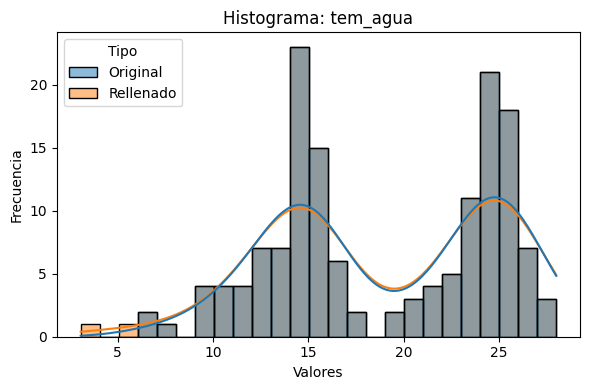

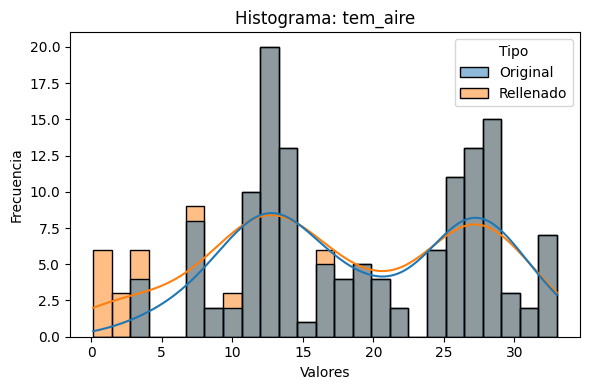

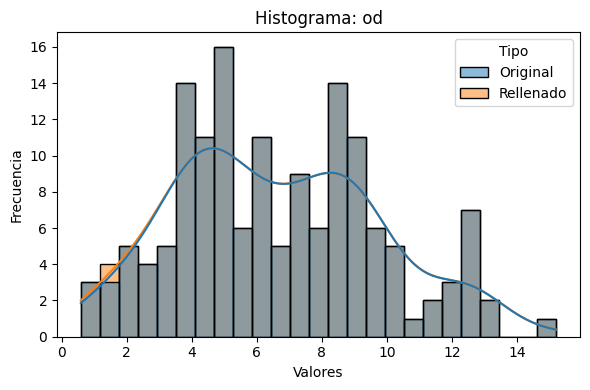

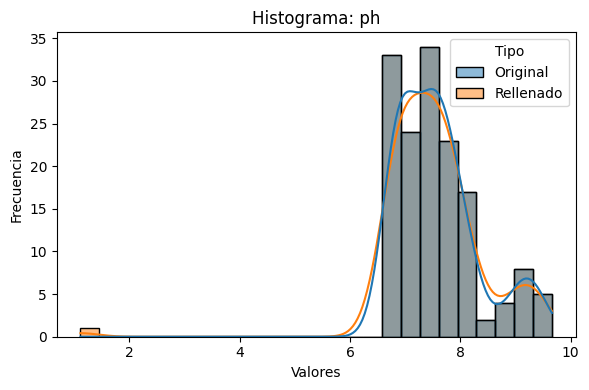

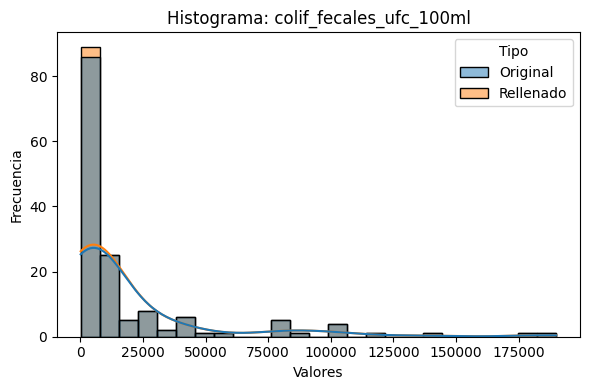

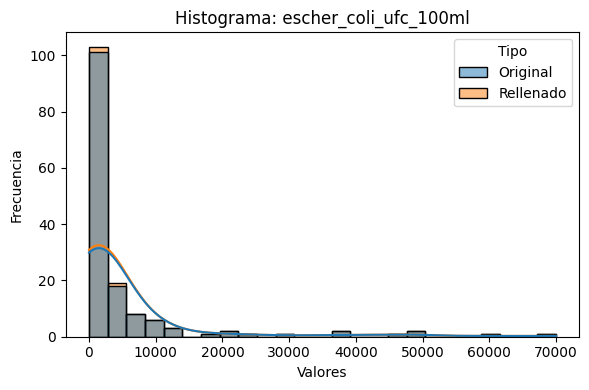

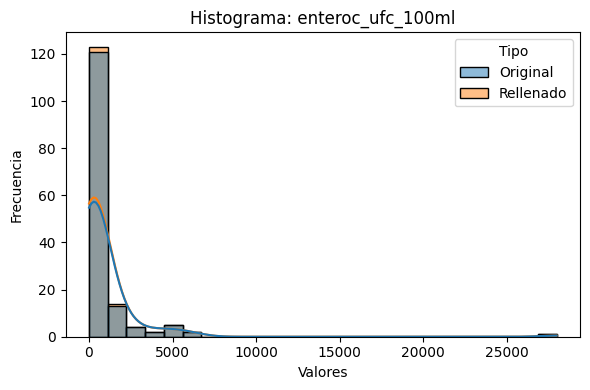

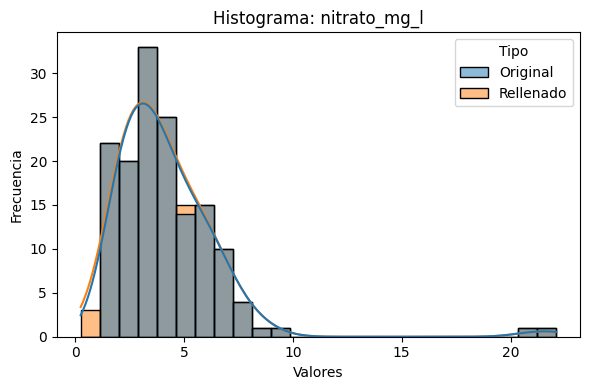

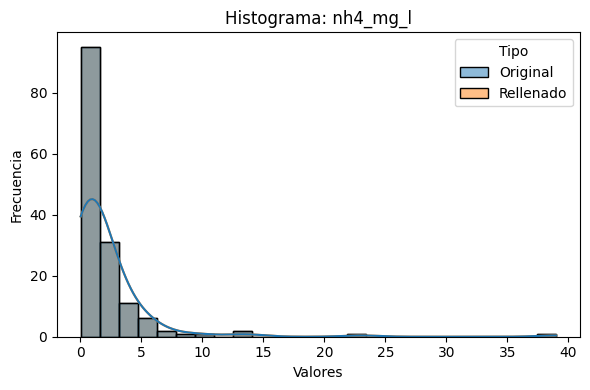

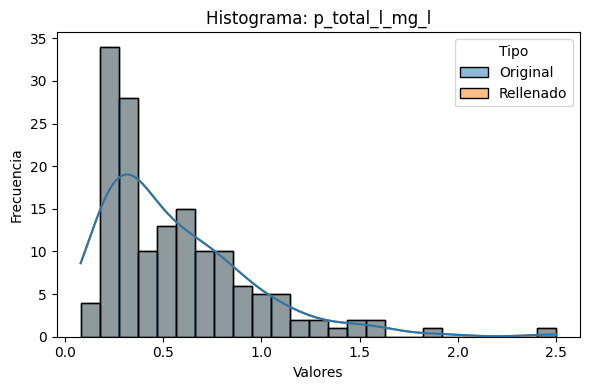

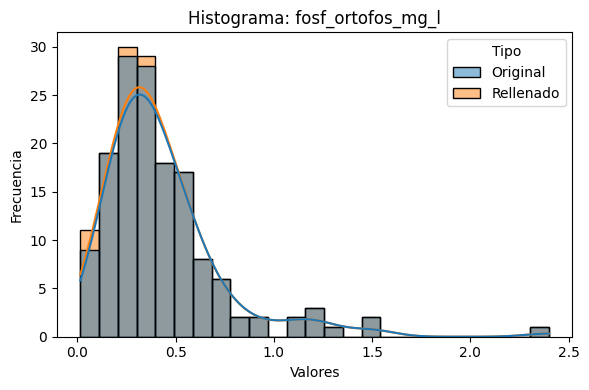

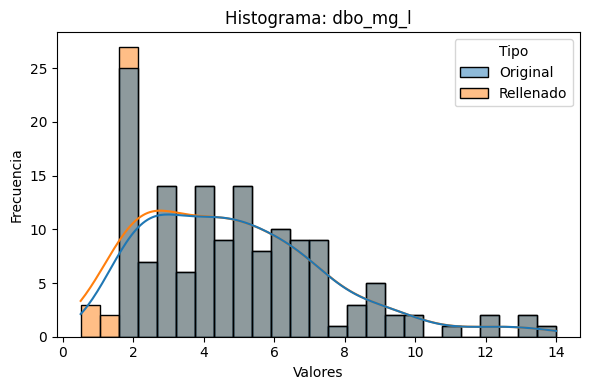

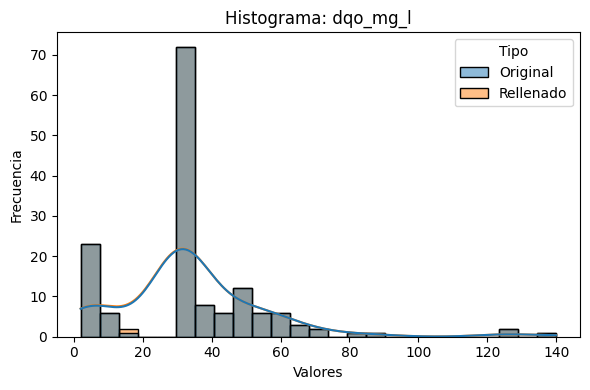

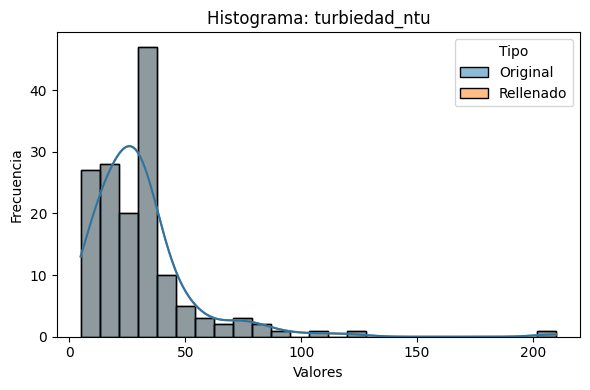

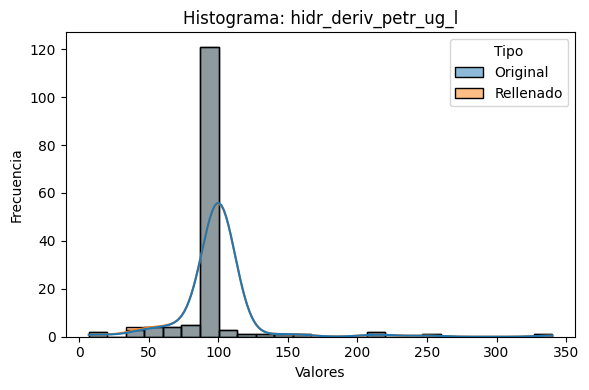

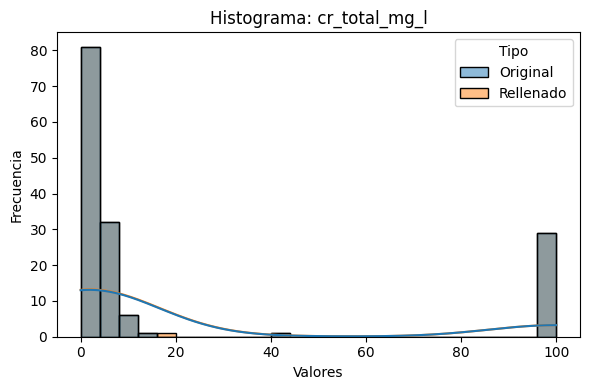

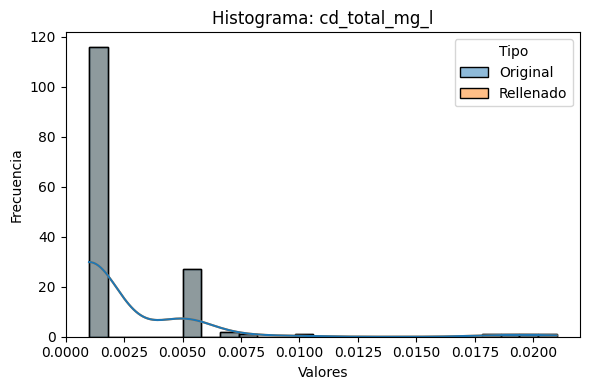

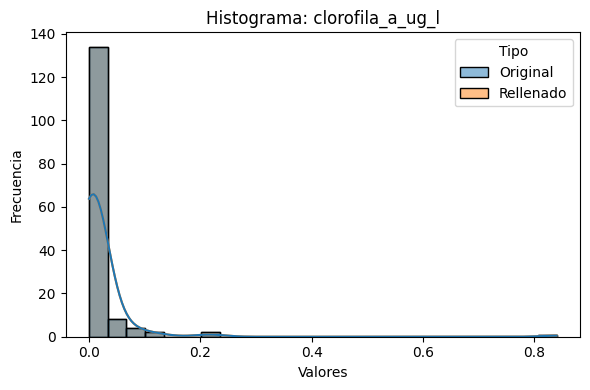

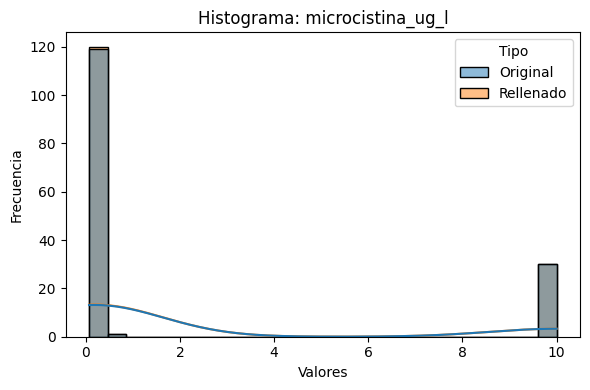

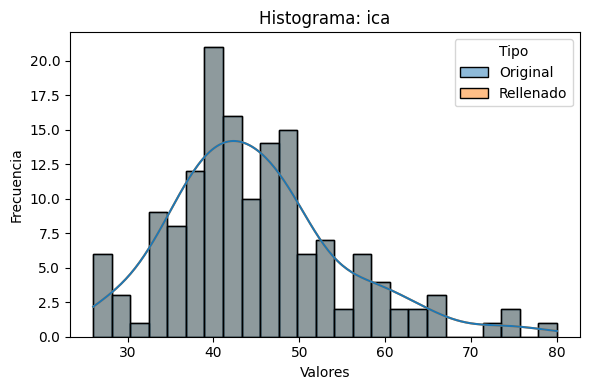

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir ambos DataFrames a formato largo y añadir una columna de 'Tipo'
df_sin_val_calculados_melted = df_sin_valores_imputados_cuantitativo.melt(var_name='Columna', value_name='Valor')
df_sin_val_calculados_melted['Tipo'] = 'Original'

df_melted = df_cuantitativo.melt(var_name='Columna', value_name='Valor')
df_melted['Tipo'] = 'Rellenado'

# Combinar ambos DataFrames en uno solo para graficar
df_comparativo = pd.concat([df_sin_val_calculados_melted, df_melted], ignore_index=True)

# Obtener columnas únicas para iterar
columnas_unicas = df_comparativo['Columna'].unique()

# Crear histogramas separados para cada columna
for col in columnas_unicas:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_comparativo[df_comparativo['Columna'] == col], x='Valor', hue='Tipo', kde=True, bins=25)
    plt.title(f'Histograma: {col}')
    plt.ylabel('Frecuencia')
    plt.xlabel('Valores')
    plt.tight_layout()  # Ajustar el layout para que no se corten los elementos
    plt.show()


---

## Hipotesis 1 - La media del ICA (Índice de Calidad de Agua) de La Plata es diferente que el de BS.AS.

Para demostrar esta hipótesis primero debemos dividir las muestras de acuerdo a la ciudad a la que pertencen. Para realizar esto agregaremos una columna dicotómica llamada 'es_bs_as' que indica si esa muestra se encuentra en la ciudad de BS.AS. o no, y separamos las muestras de ICA por ciudad.

In [42]:
#Agregamos la columna de si la muestra pertenece a la ciudad de BS AS
df['es_bs_as'] = np.where(df['codigo'].str[:2].isin(['EN', 'BS']), False, True)

#Separamos las muestras de ICA por ciudad
bs_as = df[df['es_bs_as'] == True]['ica']
la_plata = df[df['es_bs_as'] == False]['ica']

Ahora que tenemos las muestras de ICA separadas por ciudad probemos mediante un test si las medias son significativamente diferentes. Para esto debemos probar normalidad y homocedasticidad de los datos en orden de elegir que test realizar.

Test de Shapiro-Wilk para Bs As: Estadístico=0.946, p-valor=0.00011285604339186477
Test de Shapiro-Wilk para La Plata: Estadístico=0.973, p-valor=0.571486445545686


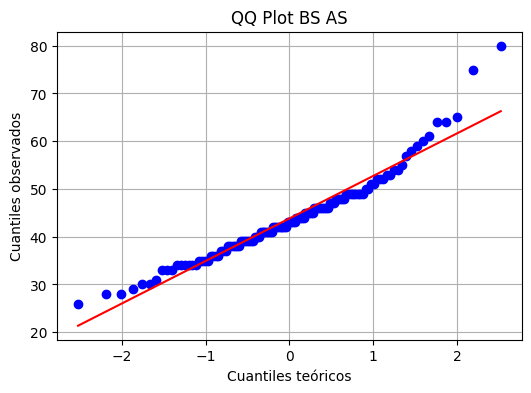

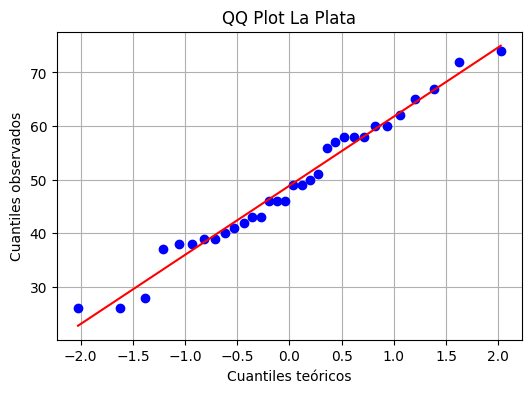

In [43]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats

#Probemos normalidad con Shapiro-Wilks
stat, p = shapiro(bs_as)
print(f"Test de Shapiro-Wilk para Bs As: Estadístico={stat:.3f}, p-valor={p}")

stat, p = shapiro(la_plata)
print(f"Test de Shapiro-Wilk para La Plata: Estadístico={stat:.3f}, p-valor={p}")


# Creemos un QQ plot para corroborar el resultado del test anterior
plt.figure(figsize=(6, 4))
stats.probplot(bs_as, dist="norm", plot=plt)
plt.title("QQ Plot BS AS")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.grid()
plt.show()

# Crear un QQ plot
plt.figure(figsize=(6, 4))
stats.probplot(la_plata, dist="norm", plot=plt)
plt.title("QQ Plot La Plata")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.grid()
plt.show()

Como podemos ver en los resultados anteriores la muestra de BS.AS no sigue una distribución normal, mientras que la muestra de La Plata sí.

In [44]:
#Probemos homocedasticidad
stat, p = stats.levene(bs_as, la_plata)
print(f"Test de Levene para ICA por ciudad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para ICA por ciudad: Estadístico=7.892, p-valor=0.006


El p-valor dio por debajo de 0.05, por lo que las muestras no son homocedasticas. Esto nos hace recurrir a un test no paramétrico

Vamos a tener que recurrir al test de Kruskal-Wallis. La hipótesis nula del test es que no existen diferencias significativas entre los dos grupos provistos. Por consiguiente, si el p-valor del test nos da por debajo de 0.05 efectivamente hay una diferencia significativa entre ambos.

In [45]:
# Test de Kruskal-Wallis
stat, p = stats.kruskal(bs_as, la_plata)
print(f"Test de Kruskal-Wallis para ICA: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa entre el índice de calidad de agua de BS AS y La Plata.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa entre el índice de calidad de agua de BS AS y La Plata.")

Test de Kruskal-Wallis para ICA: Estadístico=5.028, p-valor=0.025
Se rechaza la hipótesis nula.
Existe una diferencia significativa entre el índice de calidad de agua de BS AS y La Plata.


No podemos hacer una prueba unilateral con Kruskal-Wallis para corroborar si el ICA de La Plata es mayor que en Buenos Aires, lo que afirmaría que el agua de La Plata es más limpia, pero podemos realizar un `describe()` y analizarlo. 

In [46]:
print('Estadísticos de ICA en La Plata')
print(la_plata.describe())

print('\nEstadísticos de ICA en Buenos Aires')
print(bs_as.describe())

Estadísticos de ICA en La Plata
count    32.000000
mean     48.875000
std      12.551186
min      26.000000
25%      39.750000
50%      47.500000
75%      58.000000
max      74.000000
Name: ica, dtype: float64

Estadísticos de ICA en Buenos Aires
count    119.000000
mean      43.823529
std        9.052247
min       26.000000
25%       38.000000
50%       43.000000
75%       48.500000
max       80.000000
Name: ica, dtype: float64


Con este resultado podemos ver que la media suele ser mayor en La Plata que en Buenos Aires

---

## Hipótesis 2 - Si hay olor hay materia fecal reciente 

Veamos la correlación de la materia suspendida, aunque no necesariamente esta materia se refiere a materia fecal. Para esta correlación debemos realizar una correlación de chi-cuadrado ya que ambas variables son booleanas.

In [47]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Creamos la tabla de contingencia (frecuencia de combinaciones de las dos variables)
tabla_contingencia = pd.crosstab(df['olores'], df['mat_susp'])

# Realizamos la prueba de chi-cuadrado
chi2_stat, p_val, dof, expected = chi2_contingency(tabla_contingencia)

# Imprimimos los resultados
print(f'Estadístico de chi-cuadrado: {chi2_stat}')
print(f'Valor p: {p_val}')
print(f'Grados de libertad: {dof}')
print('Frecuencias Esperadas:')
expected_df = pd.DataFrame(expected, columns=tabla_contingencia.columns, index=tabla_contingencia.index)
print(expected_df)
print('Frecuencias obtenidas:')
print(tabla_contingencia)

# Decisión:
if p_val < 0.05:
    print("Las variables están relacionadas (rechazamos la hipótesis nula).")
else:
    print("Las variables son independientes (no se rechaza la hipótesis nula).")

Estadístico de chi-cuadrado: 12.395749332164621
Valor p: 0.00043031227816070147
Grados de libertad: 1
Frecuencias Esperadas:
mat_susp       False      True 
olores                         
False     105.774834  26.225166
True       15.225166   3.774834
Frecuencias obtenidas:
mat_susp  False  True 
olores                
False       112     20
True          9     10
Las variables están relacionadas (rechazamos la hipótesis nula).


Como vemos por el resultado del p-valor, y de las diferencias entre las frecuencias esperadas y obtenidas, hay una correlación entre el olor y la materia suspendida. 

Para ser más certeros analizaremos la correlación de las bacterias que tienen que ver con la materia fecal. En este caso nos interesan las variables 'escher_coli_ufc_100ml' (Unidades formadoras de colonias de Escherichia Coli) un indicador que contaminación fecal reciente y la variable 'colif_fecales_ufc_100ml' (Unidades formadoras de colonias de Coliformes fecales), indicador que contaminación fecal general.

También tenemos la variable 'enteroc_ufc_100ml' (Unidades formadoras de colonias de Enterococos), pero no la usaremos en el análisis ya que indica contaminación fecal de largo plazo, por lo que tendría una menor influencia en el olor.

Dado que la variable de olor es booleana y las de bacterias son cuantitativas debemos tomar una decisión para analizar la correlación de estos datos. Podríamos hacer bins de valores para luego realizar una chi-cuadrado, pero como no tenemos información suficiente del dominio para tomar la decisión de que valores elegir separamos las muestras de acuerdo a si tienen olor o no y las analizamos por separado.

In [48]:
#Separamos las muestras
con_olor = df[df['olores'] == True]
sin_olor = df[df['olores'] == False]

#Hacemos un describe de cada df
con_olor.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,18.330295,19.710526,4.171053,7.154737,40957.894737,9715.789474,2912.105263,2.600000,6.624737,0.833158,0.693684,5.438430,38.042105,23.394737,96.842105,17.560526,0.001737,0.011294,1.731579,33.789474
std,6.311046,8.180797,3.011526,0.656526,46136.877462,12565.970943,6329.311292,0.674949,8.768261,0.504040,0.397062,3.103022,26.777298,16.645903,13.250841,36.772492,0.001790,0.013403,3.678512,8.343853
min,5.075598,8.000000,0.820000,6.700000,1000.000000,500.000000,5.000000,2.000000,0.050000,0.210000,0.200000,0.509091,3.300000,5.900000,45.000000,0.005000,0.001000,0.000000,0.150000,26.000000
25%,14.550000,12.500000,1.835000,6.755000,6100.000000,1750.000000,220.000000,2.000000,2.400000,0.455000,0.440000,2.600000,30.000000,13.000000,100.000000,0.005000,0.001000,0.001000,0.150000,28.000000
50%,15.900000,22.000000,4.250000,6.820000,20000.000000,5000.000000,800.000000,2.200000,4.500000,0.650000,0.550000,6.000000,32.000000,19.000000,100.000000,0.005000,0.001000,0.010000,0.200000,31.000000
75%,24.550000,27.500000,5.200000,7.310000,81000.000000,11000.000000,2050.000000,3.050000,6.450000,1.200000,0.820000,6.850000,44.000000,30.000000,100.000000,5.000000,0.001000,0.012730,0.200000,35.000000
max,25.100000,31.000000,12.870000,9.310000,140000.000000,48000.000000,28000.000000,4.000000,39.000000,1.900000,1.500000,12.000000,125.000000,75.000000,110.000000,100.000000,0.007000,0.053000,10.000000,57.000000


In [49]:
sin_olor.describe()

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,19.057346,17.472253,6.962011,7.594592,15243.908127,4471.059147,631.198085,4.392491,1.562348,0.526061,0.393534,4.739969,33.405346,31.737879,100.429328,21.714225,0.002490,0.021971,2.195963,46.492424
std,5.856654,9.114812,2.992070,0.917514,29262.437527,10866.037247,1127.633724,2.757487,2.405207,0.355033,0.285993,2.643158,21.627466,24.866460,34.388940,39.217761,0.003546,0.079021,3.972873,9.272381
min,3.069652,0.139188,0.590000,1.116136,100.000000,5.000000,2.000000,0.253677,0.050000,0.080000,0.015364,0.560000,2.000000,4.900000,6.900000,0.005000,0.001000,0.000000,0.067157,33.000000
25%,14.500000,11.000000,4.642500,7.050000,2000.000000,200.000000,49.615385,2.875000,0.355000,0.270000,0.230000,2.475000,30.000000,18.000000,100.000000,0.005000,0.001000,0.001000,0.187500,39.750000
50%,18.000000,16.000000,6.995000,7.565000,5000.000000,1000.000000,212.500000,3.950000,0.895000,0.410000,0.325000,4.250000,30.000000,30.000000,100.000000,0.005800,0.001000,0.010000,0.200000,45.000000
75%,24.725000,26.250000,8.977500,7.965000,12250.000000,3275.000000,615.000000,5.425000,2.000000,0.742500,0.480000,6.150000,41.000000,33.250000,100.000000,9.025000,0.001175,0.010000,0.200000,50.000000
max,28.000000,33.000000,15.200000,9.660000,190000.000000,70000.000000,6100.000000,22.100000,23.000000,2.500000,2.400000,14.000000,140.000000,210.000000,340.000000,100.000000,0.021000,0.840160,10.000000,80.000000


Vemos que la media y mediana de las variables de materia fecal en las muestras con olor son mucho más altas que las muestras sin olor. Para corroborarlo haremos test de hipótesis entre ambos grupos de muestras.

Comencemos con la variable de Escherichia Coli

Test de Shapiro-Wilk para Escherichia Coli con olor: Estadístico=0.740, p-valor=0.000
Test de Shapiro-Wilk para Escherichia Coli sin olor: Estadístico=0.421, p-valor=0.000


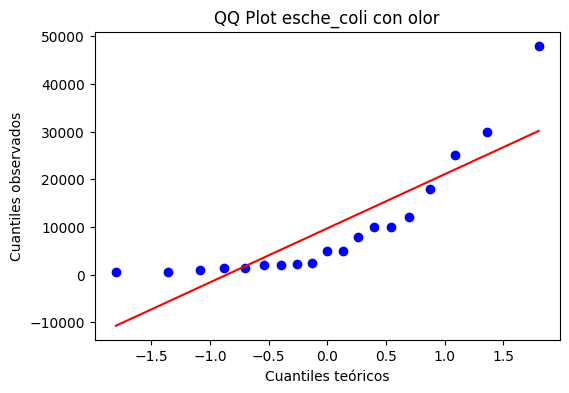

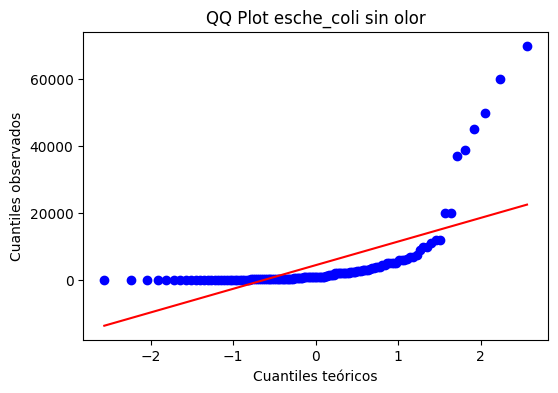

In [50]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import scipy.stats as stats

#Tomamos los datos
esche_coli_con_olor = con_olor['escher_coli_ufc_100ml']
esche_coli_sin_olor = sin_olor['escher_coli_ufc_100ml']

#Testeamos Normalidad
stat, p = shapiro(esche_coli_con_olor)
print(f"Test de Shapiro-Wilk para Escherichia Coli con olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(esche_coli_sin_olor)
print(f"Test de Shapiro-Wilk para Escherichia Coli sin olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

#Graficamos los QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(esche_coli_con_olor, dist="norm", plot=plt)
plt.title("QQ Plot esche_coli con olor")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(esche_coli_sin_olor, dist="norm", plot=plt)
plt.title("QQ Plot esche_coli sin olor")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.show()

In [51]:
#Validemos homocedasticidad
stat, p = stats.levene(esche_coli_sin_olor, esche_coli_con_olor)
print(f"Test de Levene para Escherichia Coli: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para Escherichia Coli: Estadístico=2.194, p-valor=0.141


Como resultado vemos que los datos no siguen una distribución normal, pero sí son homocedasticos, por lo que podemos recurrir al test de Mann Whitney U para evaluar la significancia estadística de las diferencias de ambos grupos. La hipótesis nula es que NO existen diferencias significativas entre los dos grupos provistos. Por consiguiente si el p-valor nos da por debajo del umbral de significancia, efectivamente hay una diferencia significativa entre ambos.

In [52]:
# Test de Mann-Whitney U
stat, p = stats.mannwhitneyu(esche_coli_con_olor, esche_coli_sin_olor)
print(f"Test de Mann-Whitney U para Escherichia Coli: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Se rechaza la hipótesis nula.")

Test de Mann-Whitney U para Escherichia Coli: Estadístico=1866.000, p-valor=0.001
Se rechaza la hipótesis nula.


Se rechazó la hipótesis nula, por lo que existe una diferencia significativa entre las bacterias de una muestra con olor y sin olor. A continuación chequearemos si hay mayor cantidad de bacterias Escherichia Coli en el agua con olor. En este caso la hipotesis nula es que la distr. esche_coli_con_olor no es significativamente mayor que la de esche_coli_sin_olor.

In [53]:
# Test de Mann-Whitney U a una cola
stat, p = stats.mannwhitneyu(esche_coli_con_olor, esche_coli_sin_olor, alternative='greater')
print(f"Test de Mann-Whitney U para escher_coli: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Se rechaza la hipótesis nula.")

Test de Mann-Whitney U para escher_coli: Estadístico=1866.000, p-valor=0.000
Se rechaza la hipótesis nula.


Como rechazamos la hipotesis nula efectivamente la variable esche_coli_ufc_100ml en agua con olor es significativamente mayor que en el agua sin olor.

Ahora probemos con la otra variable que nos interesa estudiar "colif_fecales_ufc_100ml" que indica contaminación fecal en general.

Veremos si esta variable tambien tiene una diferencia significativa entre agua con olor y sin olor.

In [54]:
colif_fecales_con_olor = con_olor['colif_fecales_ufc_100ml']
colif_fecales_sin_olor = sin_olor['colif_fecales_ufc_100ml']

Test de Shapiro-Wilk para Coliformes fecales con olor: Estadístico=0.791, p-valor=0.001
Test de Shapiro-Wilk para Coliformes fecales sin olor: Estadístico=0.519, p-valor=0.000


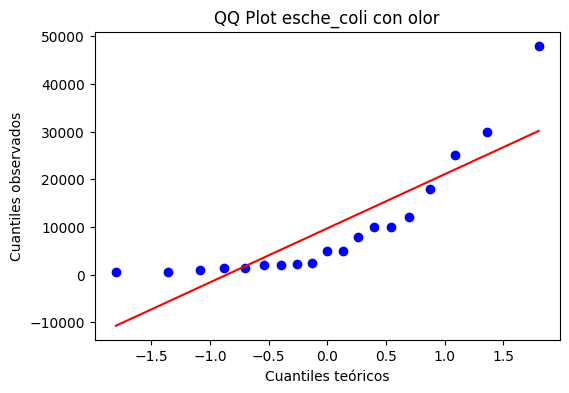

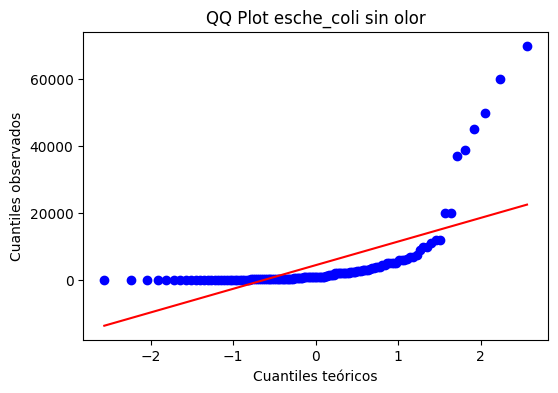

In [55]:
#Chequeemos los supuestos

#Normalidad
stat, p = shapiro(colif_fecales_con_olor)
print(f"Test de Shapiro-Wilk para Coliformes fecales con olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para países en vías de desarrollo
stat, p = shapiro(colif_fecales_sin_olor)
print(f"Test de Shapiro-Wilk para Coliformes fecales sin olor: Estadístico={stat:.3f}, p-valor={p:.3f}")

#Graficamos los QQ-Plot
plt.figure(figsize=(6, 4))
stats.probplot(esche_coli_con_olor, dist="norm", plot=plt)
plt.title("QQ Plot esche_coli con olor")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.show()

plt.figure(figsize=(6, 4))
stats.probplot(esche_coli_sin_olor, dist="norm", plot=plt)
plt.title("QQ Plot esche_coli sin olor")
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Cuantiles observados")
plt.show()

In [56]:
#Validemos homocedasticidad
stat, p = stats.levene(colif_fecales_sin_olor, colif_fecales_con_olor)
print(f"Test de Levene para coliformis fecales: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para coliformis fecales: Estadístico=8.373, p-valor=0.004


Nuevamente vemos que los datos no son normales, y en este caso tampoco homocedasticos. Por esta razón debemos probar con un test que no requiere ni normalidad ni homocedasticidad, el de Kruskal-Wallis. La hipótesis nula del test es que no existen diferencias significativas entre los dos grupos provistos. Por consiguiente, si el p-valor del test nos da por debajo de 0.05, efectivamente hay una diferencia significativa entre ambos.

In [57]:
# Test de Kruskal-Wallis
stat, p = stats.kruskal(colif_fecales_con_olor, colif_fecales_sin_olor)
print(f"Test de Kruskal-Wallis para colif_fecales: Estadístico={stat:.3f}, p-valor={p}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
else:
    print("Se rechaza la hipótesis nula.")

Test de Kruskal-Wallis para colif_fecales: Estadístico=10.661, p-valor=0.0010941798071955739
Se rechaza la hipótesis nula.


Al igual que en el caso de las Escherichia Coli se rechazó la hipótesis nula, por lo que existe una diferencia estadística significante entre ambos grupos. 
Con esto igual no podemos afirmar que hay mayor cantidad de Coliformes fecales como en el test anterior. Pero podemos graficar su distribución para comparar.

C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\2846694218.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Con olor', 'Sin olor'])


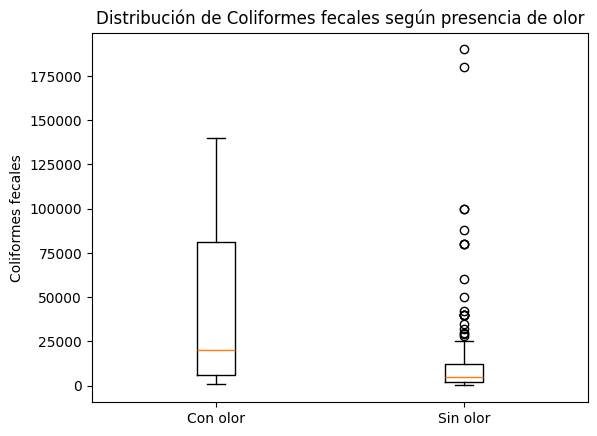

In [58]:
data = [colif_fecales_con_olor, colif_fecales_sin_olor]

# Crear boxplot
plt.boxplot(data, labels=['Con olor', 'Sin olor'])
plt.ylabel('Coliformes fecales')
plt.title('Distribución de Coliformes fecales según presencia de olor')
plt.show()

Vemos que, a pesar de los outliers de las muestras sin olor, los valores de Colif_fecales suelen ser mayor en las zonas con olor.

Con este resultado y el anterior podemos afirmar que en las zonas del Río de La Plata con presencia de olor hay una mayor cantidad de unidades formadoras de colonias de Coliformes fecales en 100ml de agua y de Escherichia Coli en 100ml de agua. Ambas indicadores de contaminación fecal.

---

## Hipótesis 3 - El Índice de Calidad de Agua (ICA) de verano es similar al de primavera y el de otoño es similar al de invierno 

Primero veamos el dataframe ordenado por sitio y por estación

In [59]:
pd.reset_option('display.max_rows') 
df.sort_values(by=['sitios', 'campaña'], ascending=True)    

,sitios,codigo,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,es_bs_as
34,Arroyo Abra Vieja y Santa Rosa,TI009,invierno,13.8,11.0,9.50,7.06,False,False,False,False,538.461538,323.076923,53.846154,2.2,0.05,0.20,0.10,2.0,30.0,29.0,100.0,0.005,0.001,0.01000,0.20,80.0,Levemente deteriorada,True
33,Arroyo Abra Vieja y Santa Rosa,TI009,otoño,12.8,8.0,8.20,6.89,False,False,False,False,5300.000000,400.000000,90.000000,3.0,0.98,0.19,0.20,5.8,2.0,30.0,140.0,100.000,0.005,0.00100,10.00,46.0,Muy deteriorada,True
35,Arroyo Abra Vieja y Santa Rosa,TI009,primavera,24.0,32.0,6.12,6.96,False,False,False,False,5000.000000,2000.000000,40.000000,4.0,0.44,0.20,0.10,2.0,34.0,33.0,100.0,0.005,0.001,0.00237,0.20,49.0,Muy deteriorada,True
32,Arroyo Abra Vieja y Santa Rosa,TI009,verano,24.7,28.0,4.17,6.85,False,False,False,False,1900.000000,360.000000,150.000000,2.5,0.34,0.59,0.30,2.0,30.0,50.0,100.0,5.000,0.001,0.00900,0.15,49.0,Muy deteriorada,True
138,Arroyo El Gato,EN083,invierno,12.1,4.0,12.72,9.25,False,False,False,False,700.000000,20.000000,50.000000,4.4,0.70,0.20,0.11,5.2,30.0,23.0,100.0,0.005,0.001,0.01000,0.20,67.0,Deteriorada,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,Río Reconquista y Río Lujan,TI004,verano,24.8,22.0,2.95,6.81,True,False,True,False,8000.000000,2200.000000,800.000000,3.2,2.30,0.89,0.44,2.3,30.0,50.0,100.0,5.000,0.001,0.00000,0.15,35.0,Extremadamente deteriorada,True
135,Toma de agua Club de Pesca,EN082,invierno,11.4,4.0,12.47,9.44,False,False,False,False,300.000000,100.000000,110.000000,5.1,1.10,0.41,0.37,8.8,47.0,31.0,100.0,0.005,0.001,0.13100,0.20,58.0,Muy deteriorada,False
134,Toma de agua Club de Pesca,EN082,otoño,14.2,12.0,11.48,8.95,False,False,False,False,400.000000,30.000000,10.000000,6.4,0.26,0.26,0.26,2.1,2.8,30.0,45.0,100.000,0.005,0.00100,10.00,72.0,Deteriorada,False
139,Toma de agua Club de Pesca,EN082,primavera,24.7,27.0,8.57,8.17,False,False,False,False,100.000000,5.000000,6.000000,6.2,0.61,0.21,0.18,2.1,30.0,14.0,100.0,0.005,0.001,0.01000,0.20,65.0,Deteriorada,False


Hagamos los gráficos de las distirbuciones para observar esto de una forma más sencilla

C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\3300956356.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['otoño', 'primavera', 'verano', 'invierno'])


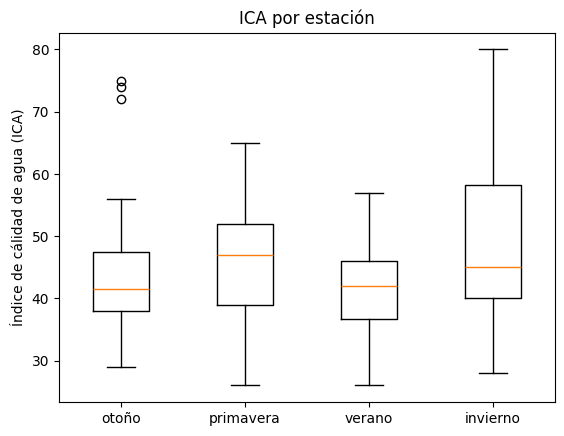

In [60]:
import matplotlib.pyplot as plt

ica_otoño = df[df['campaña']  == 'otoño']['ica']
ica_primavera = df[df['campaña']  == 'primavera']['ica']
ica_verano = df[df['campaña']  == 'verano']['ica']
ica_invierno = df[df['campaña']  == 'invierno']['ica']

data = [ica_otoño, ica_primavera, ica_verano, ica_invierno]

# Crear boxplot
plt.boxplot(data, labels=['otoño', 'primavera', 'verano', 'invierno'])
plt.ylabel('Índice de cálidad de agua (ICA)')
plt.title('ICA por estación')
plt.show()

Podemos ver que aunque hay diferencias en los valores, si prestamos especial atención al ICA en la mayoría de los casos los valores no difieren demasiado por semestre. Podríamos hacer un ANOVA para ver que estaciones son similares de acuerdo a este índice y ver si tiene sentido pensar su contaminación en terminos de los semestres planteados. Para esto debemos verificar que se cumpla el supuesto de homocedasticidad y normalidad.

In [61]:
#Normalidad
from scipy.stats import shapiro

stat, p = shapiro(ica_otoño)
print(f"Test de Shapiro-Wilk para ICA en otoño: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(ica_primavera)
print(f"Test de Shapiro-Wilk para ICA en primavera: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(ica_verano)
print(f"Test de Shapiro-Wilk para ICA en invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat, p = shapiro(ica_invierno)
print(f"Test de Shapiro-Wilk para ICA en invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para ICA en otoño: Estadístico=0.803, p-valor=0.000
Test de Shapiro-Wilk para ICA en primavera: Estadístico=0.980, p-valor=0.667
Test de Shapiro-Wilk para ICA en invierno: Estadístico=0.970, p-valor=0.371
Test de Shapiro-Wilk para ICA en invierno: Estadístico=0.945, p-valor=0.052


Podemos observar que las muestras de otoño no siguen una distribución normal, esto lo podemos solucionar quitando los outliers que observamos en el box-plot anterior

In [62]:
ica_otoño.sort_values(ascending=False)

29     75.0
142    74.0
134    72.0
130    56.0
49     48.0
1      48.0
89     48.0
113    48.0
33     46.0
109    44.0
125    44.0
105    44.0
57     43.0
61     43.0
117    42.0
93     41.0
121    41.0
25     40.0
65     39.0
97     39.0
5      39.0
53     38.0
137    38.0
101    38.0
9      36.0
45     36.0
13     35.0
85     34.0
21     31.0
17     29.0
Name: ica, dtype: float64

Vemos (por la lista anterior y el box plot del principio) que los outliers son los que tienen un valor mayor a 70. Eliminemoslos y probemos normalidad una vez más.

In [63]:
ica_otoño = ica_otoño[ica_otoño < 70]

In [64]:
#Probemos normalidad
stat, p = shapiro(ica_otoño)
print(f"Test de Shapiro-Wilk para ICA en otoño: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para ICA en otoño: Estadístico=0.979, p-valor=0.849


Ahora que los cuatro grupos tienen una distribución normal validemos homocedasticidad.

In [65]:
#validemos homocedasticidad
stat, p = stats.levene(ica_otoño, ica_primavera, ica_verano, ica_invierno)
print(f"Test de Levene para ICA en las estaciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para ICA en las estaciones: Estadístico=4.641, p-valor=0.004


Como las muestras son normales, pero no homocedasticas podemos realizar un Welch's ANOVA (ANOVA de Welch), el cual es una alternativa al ANOVA de una vía cuando el supuesto de homocedasticidad es violado. Con él podemos ver si hay una diferencia estadística significativa entre los grupos.

In [66]:
#Del df nos quedamos con los datos sin los outliers de otoño
df_sin_outliers_otoño = df[(df['campaña'] != 'otoño') | (df['ica'] < 70)][['ica', 'campaña']]

#Corremos el ANOVA de Welch
import pingouin as pg 

pg.welch_anova(dv='ica', between='campaña', data=df_sin_outliers_otoño) 

,Source,ddof1,ddof2,F,p-unc,np2
0,campaña,3,78.356732,5.200256,0.002505,0.098763


El p-valor nos dió menor a 0.05, por lo que podemos rechazar la hipótesis nula de que el ICA es igual en todas las estaciones. Para saber cual/es se diferencia/n del resto corremos una prueba post hoc para saber cuales son las estaciones que tienen una diferencia significativa. Para esto usaremos el test de Games-Howell ya que se puede utilizar cuando se viola el supuesto de homocedasticidad.

In [67]:
import pingouin as pg

#Realizamos el test de Games-Howell
post_hoc_result = pg.pairwise_gameshowell(data=df_sin_outliers_otoño, dv='ica', between='campaña')
print(post_hoc_result)

           A          B    mean(A)    mean(B)      diff        se         T  \
0   invierno      otoño  48.075000  41.037037  7.037963  2.166901  3.247940   
1   invierno  primavera  48.075000  45.585366  2.489634  2.311647  1.076996   
2   invierno     verano  48.075000  41.450000  6.625000  2.168935  3.054495   
3      otoño  primavera  41.037037  45.585366 -4.548329  1.793070 -2.536615   
4      otoño     verano  41.037037  41.450000 -0.412963  1.604888 -0.257316   
5  primavera     verano  45.585366  41.450000  4.135366  1.795528  2.303147   

          df      pval    hedges  
0  60.926894  0.009963  0.710916  
1  72.882833  0.704574  0.237860  
2  64.835280  0.016820  0.676417  
3  65.992392  0.063477 -0.572667  
4  62.484861  0.993966 -0.060933  
5  76.366618  0.106289  0.505644  


Observando los p-valores obtenidos podemos saber que grupos se diferencian. Y al contrario de lo que pensabamos invierno y otoño no se pueden evaluar juntos ya que tienen una diferencia significativa, es más, tienen el p-valor más chico indicando una diferencia más grande que el resto de pares.

Basandonos en esto podemos plantear la siguiente hipótesis:

---

## Hipótesis 4 - En Otoño el Índice de Calidad de Agua (ICA) es menor al ICA en invierno
Lo que demostraría que la calidad del agua en otoño es menor a la calidad del agua en invierno 

Recordemos las distribuciones.

C:\Users\Joaco\AppData\Local\Temp\ipykernel_10424\2554218666.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['otoño', 'invierno'])


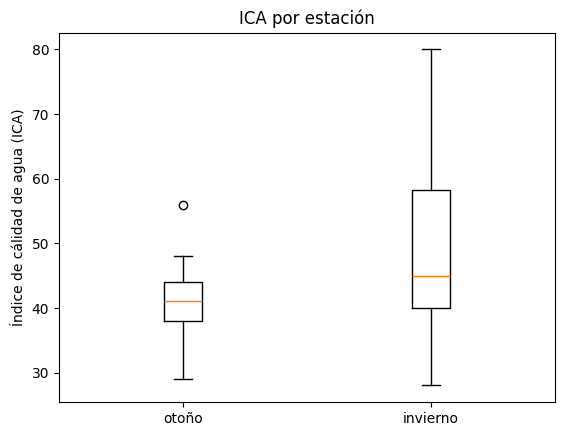

In [68]:
data = [ica_otoño, ica_invierno]

# Crear boxplot
plt.boxplot(data, labels=['otoño', 'invierno'])
plt.ylabel('Índice de cálidad de agua (ICA)')
plt.title('ICA por estación')
plt.show()

Podemos ver que hay una gran diferencia en la varianza de los datos, pero nuestra hipótesis está centrada en comparar las medias de estos grupos.

Ya sabemos que los grupos son normales, comparemos homocedasticidad.

In [69]:
#Recordemos que cumplen el supuesto de normalidad
stat, p = shapiro(ica_otoño)
print(f"Test de Shapiro-Wilk para ICA en verano: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(ica_invierno)
print(f"Test de Shapiro-Wilk para ICA en invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

#Validemos homocedasticidad
stat, p = stats.levene(ica_otoño, ica_invierno)
print(f"Test de Levene para ICA en las estaciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para ICA en verano: Estadístico=0.979, p-valor=0.849
Test de Shapiro-Wilk para ICA en invierno: Estadístico=0.945, p-valor=0.052
Test de Levene para ICA en las estaciones: Estadístico=8.661, p-valor=0.005


Como el p-valor del test de Levene nos dio menor a 0.05 los datos no son homocedasticos. Utilicemos un test t a una cola con la corrección de los grados de libertad de Welch-Satterwhite que permite compensar la diferencia de varianzas.
Con este test podemos corroborar si la media de ICA en otoño es significativamente menor (ya que a menor ICA más contaminada está el agua) que en invierno. La hipótesis nula es que NO hay diferencia significativa, por lo que ICA en otoño es mayor o igual que en invierno.

In [70]:
import pingouin as pg 

# Realizar el test t de Welch unilateral para probar si ica_verano < ica_invierno
resultado = pg.ttest(ica_otoño, ica_invierno, alternative='less', correction=True) #correction es si usa Welch

print(resultado['p-val'])

T-test    0.000946
Name: p-val, dtype: float64


Como obtuvimos de resultado un p-valor menor a 0.05 podemos rechazar la hipótesis nula y concluir que el ICA en otoño es significativamente menor que en invierno 

---

## Hipótesis 5 (Sin probar) - En verano el ICA es menor que en invierno debido a la temperatura, lo que hace proliferar las bacterias

Esto demostraría que la calidad del agua es menor en verano que en invierno.

Podemos observar en el ANOVA de la hipótesis 3 que el ICA de invierno y verano tienen una diferencia significativa con un p-valor menor a 0.05. Basandonos en esto podemos plantear que la calidad de agua en verano es peor que en invierno y comprobarlo de una forma similar a como hicimos con la hipótesis 4.

Verificamos normalidad y homocedasticidad

In [71]:
# Recordemos que cumplen el supuesto de normalidad
stat, p = shapiro(ica_verano)
print(f"Test de Shapiro-Wilk para ICA en verano: Estadístico={stat:.3f}, p-valor={p:.3f}")
stat, p = shapiro(ica_invierno)
print(f"Test de Shapiro-Wilk para ICA en invierno: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Validemos homocedasticidad
stat, p = stats.levene(ica_verano, ica_invierno)
print(f"Test de Levene para ICA en las estaciones: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para ICA en verano: Estadístico=0.970, p-valor=0.371
Test de Shapiro-Wilk para ICA en invierno: Estadístico=0.945, p-valor=0.052
Test de Levene para ICA en las estaciones: Estadístico=6.949, p-valor=0.010


Como el p-valor del test de Levene nos dio menor a 0.05 los datos no son homocedasticos. Utilicemos un test t a una cola con la correción de los grados de libertad de Welch-Satterwhite que permite compensar la diferencia de varianzas.
Con este test podemos corroborar si la media de ICA en verano es significativamente menor (ya que a menor ICA más contaminada está el agua) que en invierno. La hipótesis nula es que NO hay diferencia significativa, por lo que ICA en verano es mayor o igual que en invierno.

In [72]:
import pingouin as pg 

# Realizar el test t de Welch unilateral para probar si ica_verano < ica_invierno
resultado = pg.ttest(ica_verano, ica_invierno, alternative='less', correction=True) #correction es si usa Welch

print(resultado['p-val'])

T-test    0.001635
Name: p-val, dtype: float64


Como obtuvimos de resultado un p-valor menor a 0.05 podemos rechazar la hipótesis nula y concluir que el ICA en verano es significativamente menor que en invierno.

El siguiente paso sería probar que esto se debe debido a la diferencia de temperatura entre estas dos estaciones.

---

## Hipótesis 6 (sin probar) - El ICA está altamente influenciado por el dbo y el dqo y las bacterias indicadoras de contaminación fecal

Esta hipótesis surge de que altos valores de las variables `dqo` y `dbo` indican altos niveles de contaminación y una baja calidad de agua. Esto lo sabemos por la investigación que realizamos acerca de las variables.

Veamos la correlación que hay entre las variables de contaminación fecal con el índice de calidad de agua.

In [73]:
import numpy as np
from scipy import stats

coeficiente_correlacion, _ = stats.pearsonr(df['ica'], df['escher_coli_ufc_100ml'])
print(f"Correlación entre ICA y Escherichia Coli: {coeficiente_correlacion:.4f}")


Correlación entre ICA y Escherichia Coli: -0.4257


In [74]:
coeficiente_correlacion, _ = stats.pearsonr(df['ica'], df['colif_fecales_ufc_100ml'])
print(f"Correlación entre ICA y Coliformes fecales: {coeficiente_correlacion:.4f}")


Correlación entre ICA y Coliformes fecales: -0.5214


In [75]:
coeficiente_correlacion, _ = stats.pearsonr(df['ica'], df['enteroc_ufc_100ml'])
print(f"Correlación entre ICA y Enterococos: {coeficiente_correlacion:.4f}")


Correlación entre ICA y Enterococos: -0.3653


Y ahora veamos la correlación con ICA de `dqo`y `dbo`

In [76]:
coeficiente_correlacion, _ = stats.pearsonr(df['ica'], df['dbo_mg_l'])
print(f"Correlación entre ICA y dbo: {coeficiente_correlacion:.4f}")

coeficiente_correlacion, _ = stats.pearsonr(df['ica'], df['dqo_mg_l'])
print(f"Correlación entre ICA y dqo: {coeficiente_correlacion:.4f}")


Correlación entre ICA y dbo: -0.2696
Correlación entre ICA y dqo: -0.0380


Podemos observar que aunque la correlación lineal es menor que 0.7 las variables de contaminación fecal y el dbo pueden seguir teniendo peso sobre la variable ICA, esto lo podríamos probar realizando una regresión lineal y encontrando los coeficientes (Beta) del modelo para estos predictores. El dqo probablemente no aportaría demasiado al no tener una alta correlación lineal.

---

## Observación: Otoño tiene algo muy diferente al resto

Creímos que valía la pena mostrar el comportamiento que notamos en las muestras de otoño ya que futuras hipótesis podrían salir de analizar a qué se debe esta diferencia.

Observemos que ocurre al realizar un UMAP con las variables cuantitativas del df (excepto ica) y pintar las muestras dependiendo de la campaña (estación del año). 
El df cuantitativo ya está creado, es el que usamos cuando realizamos la imputación de los datos faltantes.

In [77]:
# !pip install numpy==2.0

Generemos el UMAP

In [78]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Saquemos la columna ica
f_ica = df['ica']

df_cuantitativo = df_cuantitativo.drop(['ica'], axis=1)

# Normalizar los datos
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_cuantitativo)

# importamos umap
import umap

# creamos el objeto, lo fitteamos en nuestros datos y lo aplicamos sobre esos mismos
X_umap = umap.UMAP(n_components=2).fit_transform(df_normalized)
# imprimimos los tamaños antes y después
print('Antes de UMAP: {}'.format(df_normalized.shape))
print('Después de UMAP: {}'.format(X_umap.shape))

c:\Users\Joaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Antes de UMAP: (151, 19)
Después de UMAP: (151, 2)


Y ahora grafiquemoslo pintando las muestras por la estación a la que pertenece

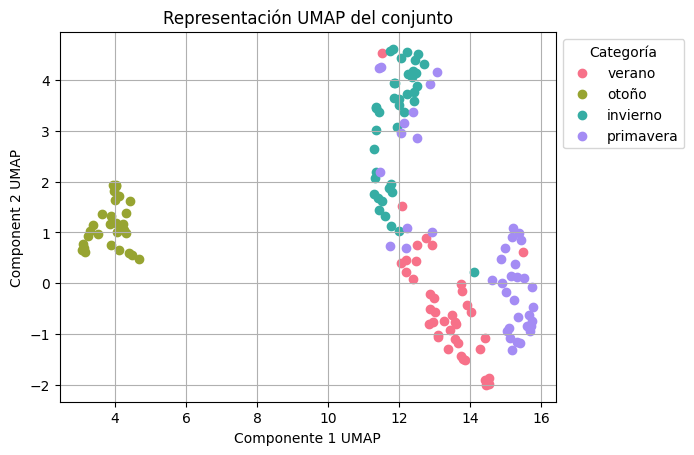

In [79]:
#PINTEMOS POR ESTACION
estaciones = df['campaña']

# Obtener colores únicos y asignar un color a cada categoría
unique_estaciones = estaciones.unique()
colors = sns.color_palette("husl", len(unique_estaciones))  # Cambia la paleta de colores si lo deseas

# Crear un diccionario para mapear cada categoría a un color
color_dict = {cat: colors[i] for i, cat in enumerate(unique_estaciones)}

# Graficar cada categoría con su color correspondiente
for cat in unique_estaciones:
    plt.scatter(X_umap[estaciones == cat, 0], X_umap[estaciones == cat, 1], 
                color=color_dict[cat], label=cat)


# graficamos los datos, el color de cada punto representa el valor de la casa
# plt.scatter(X_umap[:,0], X_umap[:,1])
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.legend(title='Categoría', loc='upper left', bbox_to_anchor=(1, 1))  # Añadir leyenda
plt.show()

Como podemos observar las muestras del resto de las estaciones están mezcladas en la derecha del gráfico mientras que las muestras de otoño está solo a la izquierda alejado del resto. 

Este comportamiento lo podemos ver tambien al realizar clustering con k-means.

Primero realicemos el elbow-plot para ver cual sería un buen k

c:\Users\Joaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Joaco\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


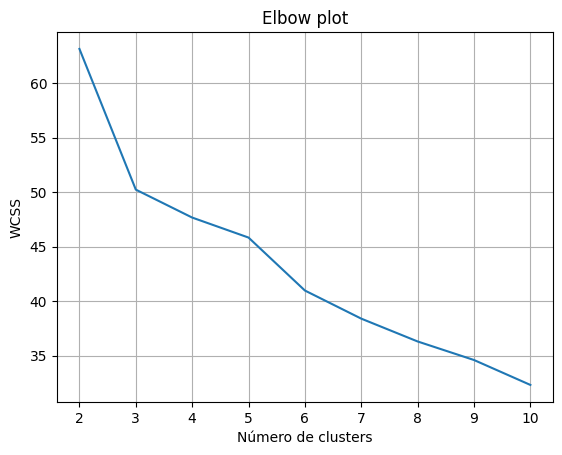

In [80]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Primero normalicemos los datos

# creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# seleccionamos las columnas para la normalización
numeric_cols = df_cuantitativo.select_dtypes(include=np.number).columns

# ajustamos el scaler a los datos y transformamos los datos
df_cuantitativo[numeric_cols] = scaler.fit_transform(df_cuantitativo[numeric_cols])

# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_cuantitativo)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Vemos que k=3 y k=5 son buenos numero para realizar el clustering, podriamos ver cuál sería mejor mediante diferentes métricas como el índice de Davies Bouldin o el coeficiente de silueta.

Realicemos ambos clusters y veamos cual es mejor.

In [81]:
from sklearn.cluster import KMeans

# Para k = 3

# Inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=3, verbose=0, random_state=10)
# Lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(df_cuantitativo)
# Y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_3 = kmeans.predict(df_cuantitativo)

# Para k = 5

# Inicializamos un objeto de la clase KMeans con el modelo
kmeans = KMeans(n_clusters=5, verbose=0, random_state=10)
# Lo aplicamos sobre nuestros datos para hallar los centroides
kmeans.fit(df_cuantitativo)
# Y obtenemos los clusters a los que fueron asignadas las muestras
clusters_kmeans_5 = kmeans.predict(df_cuantitativo)

K-means 3
DB score: 1.2868
Silhouette score: 0.3301
----------
K-means 5
DB score: 1.2910
Silhouette score: 0.2665
----------


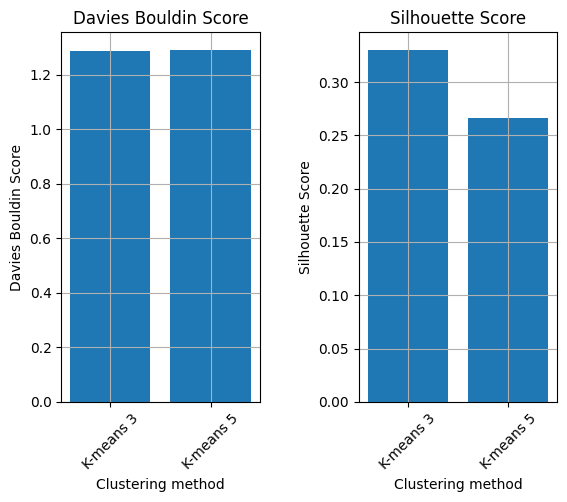

In [82]:
# Con los resultados veamos ambas métricas
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans_3, clusters_kmeans_5]
clustering_methods = ['K-means 3', 'K-means 5']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(df_cuantitativo, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(df_cuantitativo, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Bouldin Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Bouldin Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

Como resultado obtuvimos que ambos son muy parecidos, en el de Davies Bouldin no hay diferencia practicamente, pero en el de silueta el k=3 es un poco mejor ya que está más cerca de 1.

Grafiquemos con esta cantidad de clusters y veamos las muestras por estación.

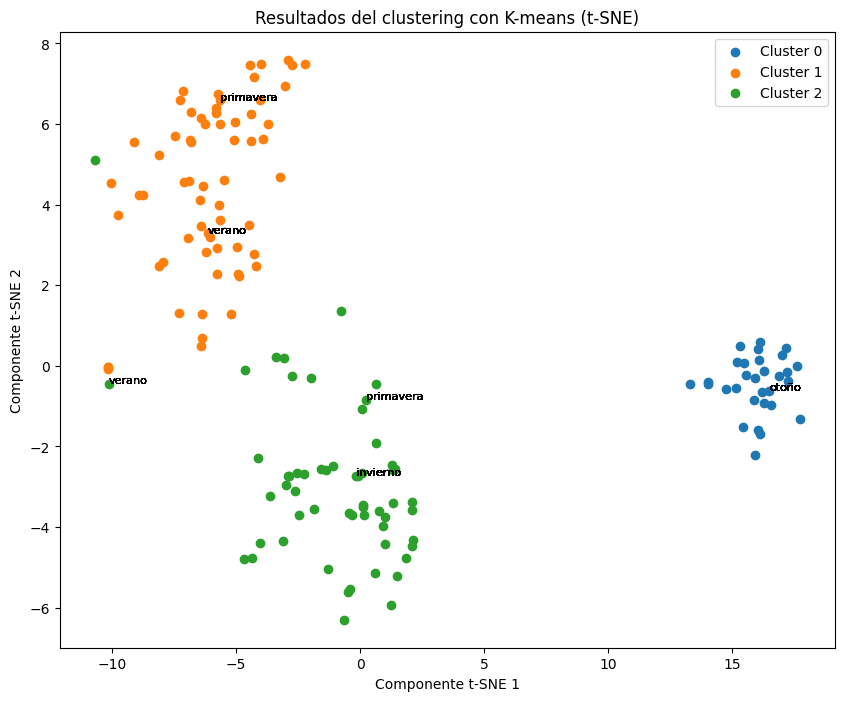

In [83]:
from sklearn.manifold import TSNE

# Separamos la feature campaña (estación)
f_estacion = df['campaña']

# Reducir la dimensionalidad de los datos usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_cuantitativo)

# Crear un DataFrame con los resultados de t-SNE y los clusters
tsne_df = pd.DataFrame({'x': tsne_results[:, 0], 'y': tsne_results[:, 1], 'Cluster': clusters_kmeans_3, 'Estación': f_estacion})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(3):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')

  # Seleccionar estaciones para etiquetar los clusters
  countries_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Estación'].tolist()

  for f_estacion in countries_to_label:
    row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Estación'] == f_estacion)]
    if not row.empty:
      plt.text(row['x'].values[0], row['y'].values[0], f_estacion, fontsize=8)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()

Como podemos ver al realizar el clustering con k=3 las muestras de otoños quedan agrupadas juntas y separadas de las otras

Por el UMAP y el k-means creemos que varias hipótesis nuevas podrían salir de explorar un poco más los datos de la campaña de otoño